In [1]:
import pandas as pd
import numpy as np

In [ ]:
#결측값 심화
#정규분포 표준화 작업
#표준화= ( 데이터-(각 열,행 데이터 평균) )/각 열,행 표준편차

In [8]:
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
df=pd.DataFrame(np.random.randn(5,3),
               columns=["c1","c2","c3"])
df.ix[0,0]=np.nan
df.ix[2,["c2"]]=None
df

,c1,c2,c3
0,NaN,-1.150740,0.315921
1,2.524589,0.332164,2.805467
2,-0.542391,-1.355333,-0.043084
3,-0.385352,0.170322,-0.284678
4,0.247034,-0.447652,1.102286


In [10]:
df.ix[1,["c1",'c3']]=np.nan
df

,c1,c2,c3
0,NaN,-1.150740,0.315921
1,NaN,0.332164,NaN
2,-0.542391,-1.355333,-0.043084
3,-0.385352,0.170322,-0.284678
4,0.247034,-0.447652,1.102286


In [12]:
df.ix[2,["c2"]]=None
df.ix[3,["c2"]]=None
df.ix[4,["c3"]]=None
df

,c1,c2,c3
0,NaN,-1.150740,0.315921
1,NaN,0.332164,NaN
2,-0.542391,NaN,-0.043084
3,-0.385352,NaN,-0.284678
4,0.247034,-0.447652,NaN


In [18]:
#nan자리 다 0으로
# df.fillna(0)
# df.fillna(method="ffill")

,c1,c2,c3
0,0.000000,-1.150740,0.315921
1,0.000000,0.332164,0.000000
2,-0.542391,0.000000,-0.043084
3,-0.385352,0.000000,-0.284678
4,0.247034,-0.447652,0.000000


In [47]:
df.fillna(df.mean())
df.where(pd.notnull(df),df.mean(),axis="columns")

,c1,c2,c3
0,-0.226903,-1.150740,0.315921
1,-0.226903,0.332164,-0.003947
2,-0.542391,-0.422076,-0.043084
3,-0.385352,-0.422076,-0.284678
4,0.247034,-0.447652,-0.003947


In [43]:
arr=np.array([1,2,3,10,20,30,0.1,0.2])
np.min(arr)
np.argmin(arr)#최소값 위치가나온다.
np.max(arr)
np.argmax(arr)#최대값의 index
np.where(arr<1)
#where함수는 조건문 사용 -> 출력값:인덱스
np.where(arr>=10,0,arr)
#np.where(조건, 참, 거짓)

array([1. , 2. , 3. , 0. , 0. , 0. , 0.1, 0.2])

In [51]:
df.fillna(df.mean()['c1'])
df.fillna(df.mean()['c1':'c2'])

,c1,c2,c3
0,-0.226903,-1.150740,0.315921
1,-0.226903,0.332164,NaN
2,-0.542391,-0.422076,-0.043084
3,-0.385352,-0.422076,-0.284678
4,0.247034,-0.447652,NaN


In [69]:
df=pd.DataFrame({'c1':[1,2,3,4,5],
             'c2':[6,7,8,9,10]})
df.ix[[1,3],['c2']]=np.nan
df
#c2p 열에는 c2열 값이 notnull이면 c2열 값을,
#c2열 값이 null이면 c1열 값으로 채우고자 함
from numpy import NaN,NAN,nan
df['c2p']=np.where(pd.notnull(df['c2'])==True,
                   df['c2'],df['c1'])
for i in df.index:
    if pd.notnull(df.ix[i,'c2'])==True:
        df.ix[i,'c2p']=df.ix[i,'c2']
    else:
        df.ix[i,'c2p']=df.ix[i,'c1']
df

,c1,c2,c2p
0,1,6.0,6.0
1,2,NaN,2.0
2,3,8.0,8.0
3,4,NaN,4.0
4,5,10.0,10.0


In [70]:
#dropna 메서드 : 열(axis=1)/행(axis=0) 제거
df=pd.DataFrame({'c1':[1,2,3,4,5],
             'c2':[6,7,8,9,10]})
df.ix[[1,3],['c2']]=np.nan
df

,c1,c2
0,1,6.0
1,2,NaN
2,3,8.0
3,4,NaN
4,5,10.0


In [73]:
df.dropna(axis=0)#결측값이 있는 행 전체 제거
df.dropna(axis=1)#결측값이 있는 열 전체 제거
df[['c1','c2']].dropna()

,c1,c2
0,1,6.0
2,3,8.0
4,5,10.0


In [89]:
#결측값 보간(interpolate)
"""
1)시계열데이터에 대해 선형적으로 비례하는 값
이미지 보간 : 그라데이션과 비슷
0
2
4
na <- 6 넣어주기
8
"""
from datetime import datetime
#datetime모듈에 있는 datetime 함수
dateStr=['01-13-2020','1.16.2020',
        '1/17/2020','1/20/2020']
dates=pd.to_datetime(dateStr)
dates

DatetimeIndex(['2020-01-13', '2020-01-16', '2020-01-17', '2020-01-20'], dtype='datetime64[ns]', freq=None)

In [90]:
ts=pd.Series([1,np.nan,np.nan,10],index=dates)
ts

2020-01-13     1.0
2020-01-16     NaN
2020-01-17     NaN
2020-01-20    10.0
dtype: float64

In [91]:
tslr=ts.interpolate()#method='values' default
#method=values:선형적으로 비례하게 결측값 보간
tslr

2020-01-13     1.0
2020-01-16     4.0
2020-01-17     7.0
2020-01-20    10.0
dtype: float64

In [93]:
tsTime=ts.interpolate(method='time',limit=1)
tsTime

2020-01-13     1.000000
2020-01-16     4.857143
2020-01-17          NaN
2020-01-20    10.000000
dtype: float64

In [ ]:
#na를 대체 : fillna, replace 
#fillna : na를 다른 값으로 대체
#replace : na 뿐만 아니라 다른 모든 값에 대해서도 대체 가능
#결측값/실측값 대상 데이터 교체

In [113]:
s=pd.Series([1,2,3,4,np.nan])
s
#replace : 결측값/실측값 변경
s.replace(3,9)
s.replace(np.nan,5) #nan -> 5
s=pd.Series([1,2,3,1,np.nan])
s.replace([1,2,3],[6,7,8])
s.replace([1,2,3,np.nan],[10,20,30,99])

0    10.0
1    20.0
2    30.0
3    10.0
4    99.0
dtype: float64

In [115]:
s
s.replace({1:5,3:30,np.nan:99}) #{원래값:변경값}

0     5.0
1     2.0
2    30.0
3     5.0
4    99.0
dtype: float64

In [123]:
#데이터프레임에서 replace 적용
df=pd.DataFrame({'c1':['aaa','b','c','d'],
                       'c2':[1,2,3,4],
                       'c4':['aaa','b','c','d']
                })
df.replace({'c1':'aaa'},{'c1':'bbb'})
df.replace({'c3':np.nan},{'c3':99})

,c1,c2,c4
0,aaa,1,aaa
1,b,2,b
2,c,3,c
3,d,4,d


In [124]:
#병합 : 중복 데이터 발생
#중복데이터 여부:duplicated()
#중복데이터 처리:drop_duplicates()한개만 남겨놓고 나머지는 제거

In [125]:
df=pd.DataFrame({
    'k1':['a','b','b','c','c'],
    'k2':['x','y','y','x','z'],
    'cool':[10,20,30,40,50]
})
df

,k1,k2,cool
0,a,x,10
1,b,y,20
2,b,y,30
3,c,x,40
4,c,z,50


In [135]:
df.duplicated(['k1'])
df.duplicated(['k2'])
df.duplicated(['k1','k2'])
df.duplicated(['k1'],keep='first')#keep='first' 디폴트
df.duplicated(['k1'],keep='last')
df.duplicated(['k1'],keep=False)#중복은 모두 True

0    False
1     True
2     True
3     True
4     True
dtype: bool

In [143]:
#중복값 제거(1개만 살리고 나머지 중복은 제거)
df
df.drop_duplicates(['k1'],keep='first')
df.drop_duplicates(['k1'],keep='last')
df.drop_duplicates(['k1'],keep=False)

,k1,k2,cool
0,a,x,10


In [144]:
# 유일한값 : unique()
# 유일한값 개수 세기 : values_counts()

In [149]:
df=pd.DataFrame({
    'a':['a1','a1','a2','a2','a3'],
    'b':['b1','b1','b2','b2',np.nan],
    'c':[1,1,3,4,4]
})
df['b'].unique()
# help(pd.Series.unique)

array(['b1', 'b2', nan], dtype=object)

In [161]:
#유일값 개수 세기
# help(pd.Series.value_counts)
#normalize=디폴트(False):개수, True:상대비율
df['a'].value_counts(normalize=True)
#sort=True:개수 기준 정렬
df['a'].value_counts(normalize=False,
                     sort=True,
                     ascending=True)#개수기준 오름 차순 False 내림차순



a3    1
a1    2
a2    2
Name: a, dtype: int64

In [168]:
df['c'].value_counts(sort=True,ascending=False)
#default:sort=True, ascending=False
#유일한 값의 개수를 기준으로 내림차순
df['c'].value_counts(sort=True,ascending=True)
#유일한 값의 개수를 기준으로 오름차순
df['c'].value_counts(sort=False)
#정렬 기준이 없음

1    2
3    1
4    2
Name: c, dtype: int64

In [169]:
df

,a,b,c
0,a1,b1,1
1,a1,b1,1
2,a2,b2,3
3,a2,b2,4
4,a3,NaN,4


In [178]:
df['b'].value_counts()
#default : dropna=True (na는 제외된 체로 계산)
df['b'].value_counts(dropna=False)
df['c']#1 1 3 4 4
#group별 데이터 개수 세기
df['c'].value_counts(bins=[0,1,2,3,4,5],sort=False)
#():개구간, []:폐구간
# res=pd.cut(df['c'],bins=[0,1,2,3,4,5])
# pd.value_counts(res)

(3, 4]    2
(0, 1]    2
(2, 3]    1
(4, 5]    0
(1, 2]    0
Name: c, dtype: int64

In [179]:
#변수들 간 척도가 다른 경우 데이터 표준화
#모집단 : 전체 집단, 
#모집단에서 표본 추출 -> 표본집단 평균, 표준편차...
#->통계량=>모평균, 모분산(모수, parameter) 추정
"""
모수적방법
중심극한정리 : 무작위로 복원추출하면, 연속형 자료의 평균에 대한 분포는
정규분포를 띈다면
-30개 이상의 표본의 경우에 정규분포를 따른다. 가정

비모수적방법
-10개 미만의 표본의 경우에는 모수적 방법을 사용 못함
-자료를 크기로 나열->순위 매김 => 차이 비교

표준화 : (각데이터-평균) / 표준편차
모집단이 정규분포를 따르는 경우에,
평균:0, 표준편차:1인 표준정규분포로 표준화하는 작업
1)numpy 2) scipy.stats:zscore
3)sklearn.preprocessing
"""

'\n모수적방법\n중심극한정리 : 무작위로 복원추출하면, 연속형 자료의 평균에 대한 분포는 정규분포를 띈다면\n-30개 이상의 표본의 경우에 정규분포를 따른다.\n\n비모수적방법\n-10개 미만의 표본의 경우네는 모수적 방법을 시작하여\n-자료를 크기로 나열->순위에\n'

In [ ]:
#표준화;(각데이터-평균)

In [205]:
from numpy import*
data=np.random.randint(30, size=(6,5))
data

array([[20, 26,  2,  0,  8],
       [18,  4, 15, 10,  9],
       [ 8, 27, 28,  1, 11],
       [22,  5,  5, 28,  2],
       [ 2,  3,  8,  1, 11],
       [20, 21, 21, 19, 25]])

In [209]:
data_std=np.std(data,axis=0)
#표준편차 : np.std()
data_std
#np.mean(data, axis=0)#각 열 평균
#np.mean(data, axis=1)#각 행 평균
print(data)
print("="*30)
print(np.mean(data, axis=0))
print("="*30)
print(data-np.mean(data,axis=0))
#np.std(data)전체 data에 대한 표준편차
#표준화=(각 데이터 - 평큔(각 열))/std(각 열)
np.std(data,axis=0)#각 열에 대한 표준편차
std_data=((data-np.mean(data,axis=0))/np.std(data,axis=0))
print(std_data)
print(np.mean(std_data,axis=0))
print(np.std(std_data, axis=0))

[[20 26  2  0  8]
 [18  4 15 10  9]
 [ 8 27 28  1 11]
 [22  5  5 28  2]
 [ 2  3  8  1 11]
 [20 21 21 19 25]]
[15.         14.33333333 13.16666667  9.83333333 11.        ]
[[  5.          11.66666667 -11.16666667  -9.83333333  -3.        ]
 [  3.         -10.33333333   1.83333333   0.16666667  -2.        ]
 [ -7.          12.66666667  14.83333333  -8.83333333   0.        ]
 [  7.          -9.33333333  -8.16666667  18.16666667  -9.        ]
 [-13.         -11.33333333  -5.16666667  -8.83333333   0.        ]
 [  5.           6.66666667   7.83333333   9.16666667  14.        ]]
[[ 0.67832345  1.10957459 -1.21979584 -0.93275532 -0.43151697]
 [ 0.40699407 -0.98276607  0.20026499  0.01580941 -0.28767798]
 [-0.94965283  1.20468099  1.62032582 -0.83789885  0.        ]
 [ 0.94965283 -0.88765967 -0.89208949  1.72322594 -1.29455091]
 [-1.76364096 -1.07787246 -0.56438315 -0.83789885  0.        ]
 [ 0.67832345  0.63404262  0.85567768  0.86951767  2.01374587]]
[ 3.70074342e-17 -5.55111512e-17  7.40148

In [210]:
import scipy.stats as ss

In [211]:
data_ss=ss.zscore(data)
data_ss

array([[ 0.67832345,  1.10957459, -1.21979584, -0.93275532, -0.43151697],
       [ 0.40699407, -0.98276607,  0.20026499,  0.01580941, -0.28767798],
       [-0.94965283,  1.20468099,  1.62032582, -0.83789885,  0.        ],
       [ 0.94965283, -0.88765967, -0.89208949,  1.72322594, -1.29455091],
       [-1.76364096, -1.07787246, -0.56438315, -0.83789885,  0.        ],
       [ 0.67832345,  0.63404262,  0.85567768,  0.86951767,  2.01374587]])

In [212]:
from sklearn.preprocessing import*

In [214]:
ss_data=StandardScaler().fit_transform(data)
ss_data

array([[ 0.67832345,  1.10957459, -1.21979584, -0.93275532, -0.43151697],
       [ 0.40699407, -0.98276607,  0.20026499,  0.01580941, -0.28767798],
       [-0.94965283,  1.20468099,  1.62032582, -0.83789885,  0.        ],
       [ 0.94965283, -0.88765967, -0.89208949,  1.72322594, -1.29455091],
       [-1.76364096, -1.07787246, -0.56438315, -0.83789885,  0.        ],
       [ 0.67832345,  0.63404262,  0.85567768,  0.86951767,  2.01374587]])

In [ ]:
#예외적인 값(이상치, 특이값, outlier)이 들어있는 데이터 표준화
#표준정규분포로의 표준화:이상치, 특이값(값이 크게 벗어나는)이 
#없어야 한다는 전제 가정
# z = (x - mean) / std

#이상치가 데이터에 포함되어 있는 경우에는
#표준화를 어떻게?
#1)이상치, 특이값을 찾아서 제거
#2) 표준화 식에서 평균값과 표준편차 값이 이상치에 영향을 많이 받으므로
#이들 대신에 중앙값(median), IQR(3사분위수-1사분위수)을 이용하여 스케일링


In [ ]:
#RobustScaler():이상치가 있는 데이터 표준화

In [216]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

In [219]:
mu, sigma=5,2

In [220]:
x=mu+sigma*np.random.randn(100)
x

array([ 8.43650131,  7.12180995,  7.17494253,  1.57905289,  3.2823568 ,
       10.70170605, 10.61219871,  5.79872049,  3.6060293 ,  4.01384166,
        6.52654602,  2.50941596,  6.03971567,  4.8238445 ,  4.8786036 ,
        1.98261169,  5.54467056,  4.73231864,  3.81128652,  4.65978841,
        7.94392712,  5.34584887,  7.65948052,  6.00345912,  6.40759213,
        4.59919803,  4.65660759,  7.12264292,  4.68034899,  4.51715311,
        4.29972226,  8.75254962,  9.10649051,  3.21067473,  9.28315922,
        4.30932259,  5.50719641,  7.07424056,  3.07752517,  5.65872256,
        2.91346097,  2.71167224,  5.85549753,  2.71710742,  3.24898726,
        6.46819668,  7.00280007,  7.5982099 ,  4.75339377,  7.47976933,
        7.02501495,  7.28676291,  3.03513944,  8.15049326,  4.02248744,
        5.18822179,  3.16429102,  6.87863463,  3.81507145,  4.17808845,
        5.39324275,  5.22191329,  6.92487881,  5.40258599,  0.53908083,
        8.23624074,  3.91150258,  3.11353101,  7.69817984,  2.69

2.254378507933812

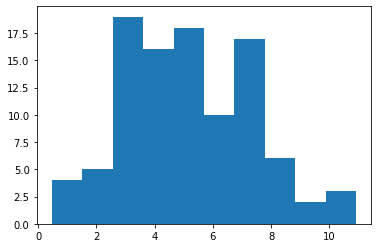

In [224]:
plt.hist(x)
np.mean(x)
np.std(x)

In [225]:
x[98:100]=100
x

array([  8.43650131,   7.12180995,   7.17494253,   1.57905289,
         3.2823568 ,  10.70170605,  10.61219871,   5.79872049,
         3.6060293 ,   4.01384166,   6.52654602,   2.50941596,
         6.03971567,   4.8238445 ,   4.8786036 ,   1.98261169,
         5.54467056,   4.73231864,   3.81128652,   4.65978841,
         7.94392712,   5.34584887,   7.65948052,   6.00345912,
         6.40759213,   4.59919803,   4.65660759,   7.12264292,
         4.68034899,   4.51715311,   4.29972226,   8.75254962,
         9.10649051,   3.21067473,   9.28315922,   4.30932259,
         5.50719641,   7.07424056,   3.07752517,   5.65872256,
         2.91346097,   2.71167224,   5.85549753,   2.71710742,
         3.24898726,   6.46819668,   7.00280007,   7.5982099 ,
         4.75339377,   7.47976933,   7.02501495,   7.28676291,
         3.03513944,   8.15049326,   4.02248744,   5.18822179,
         3.16429102,   6.87863463,   3.81507145,   4.17808845,
         5.39324275,   5.22191329,   6.92487881,   5.40

(array([ 7., 26., 31., 24.,  7.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 <a list of 50 Patch objects>)

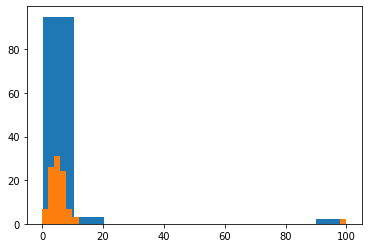

In [230]:
np.mean(x)
np.std(x)
plt.hist(x)
plt.hist(x,bins=np.arange(0,102,2))

(array([95.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.4886594 ,  0.25073819,  0.99013578,  1.72953337,  2.46893096,
         3.20832855,  3.94772614,  4.68712373,  5.42652132,  6.16591891,
         6.9053165 ]),
 <a list of 10 Patch objects>)

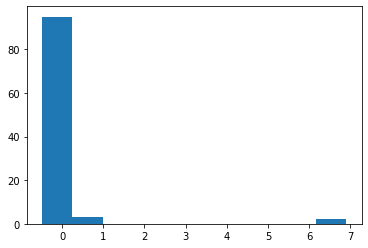

In [244]:
x=x.reshape(-1,1) #(100,) -> (100,1)
#reshape(-1,1) 앞에 -1은 뒤에 숫자에 맞추어 데이터 알아서 계산
x.shape
ss_x=StandardScaler().fit_transform(x)
np.mean(ss_x)
np.std(ss_x)
plt.hist(ss_x)

(array([ 0.,  0.,  0.,  0.,  0.,  4.,  9., 25., 23., 15., 14.,  5.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

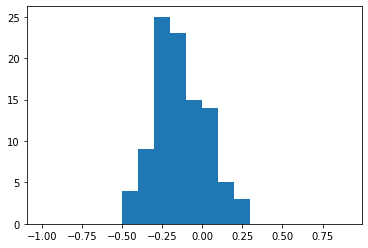

In [247]:
ss_x_z=ss_x[ss_x<5]#이상치 제거
plt.hist(ss_x_z,bins=np.arange(-1,1,0.1))

In [256]:
#이상치 포함 데이터의 중앙값, IQR을 이용->표준화
np.median(x)
x
q1=np.percentile(x,25)#1사분위수 3.239
q3=np.percentile(x,75)#3사분위수 7.008
iqr=q3-q1# 3.7689
iqr

3.7689446690808714

(array([ 0.,  4.,  1.,  1.,  4., 14.,  2.,  7.,  4., 11.,  2.,  7.,  5.,
         3.,  4.,  5.,  5.,  6.,  2.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <a list of 19 Patch objects>)

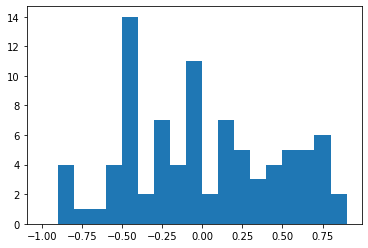

In [266]:
x_rs=RobustScaler().fit_transform(x)
x_rs
np.median(x_rs)#0
np.mean(x_rs)#0.59
np.std(x_rs)#4.71
# plt.hist(x_rs)
x_rs_z=x_rs[x_rs<10]
plt.hist(x_rs_z,bins=np.arange(-1,1,0.1))

In [269]:
#문제1
import numpy as np
arr=np.array([[10, 20, 30, 40],
            [50, 60, 70, 80]])
arr

array([[10, 20, 30, 40],
       [50, 60, 70, 80]])

In [279]:
#문제2
import numpy as np
m = np.array([[ 0,  1,  2,  3,  4],
              [ 5,  6,  7,  8,  9],
              [10, 11, 12, 13, 14]])
print(m[1,2])
print(m[-1,-1])
print(m[1,1:3])
print(m[1:3,2])
print(m[0:2,3:5])

7
14
[6 7]
[ 7 12]
[[3 4]
 [8 9]]


In [287]:
#문제3
import numpy as np
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
              11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
for i in range(0,len(x)):
    if x[i]%3==0:
        print(x[i],end=" ")
print()
for i in range(0,len(x)):
    if x[i]%4==1:
        print(x[i],end=" ")
print()
for i in range(0,len(x)):
    if x[i]%3==0 and x[i]%4==1:
        print(x[i],end=" ")

3 6 9 12 15 18 
1 5 9 13 17 
9 

[[-0.5924806   0.43279337 -0.47367361 -0.50244517]
 [ 0.63878901  0.43279337 -0.47367361  0.78684529]
 [-0.2846632  -0.4745452  -0.47367361 -0.48885426]
 ...
 [ 0.          0.43279337  2.00893337 -0.17626324]
 [-0.2846632  -0.4745452  -0.47367361 -0.04438104]
 [ 0.17706291 -0.4745452  -0.47367361 -0.49237783]]


([array([ 83., 522., 188.,  83.,  14.,   1.,   0.,   0.,   0.,   0.]),
  array([  0., 608., 209.,  44.,  18.,   5.,   0.,   7.,   0.,   0.]),
  array([  0., 678., 118.,  80.,   5.,   4.,   5.,   1.,   0.,   0.]),
  array([  0., 702., 136.,  31.,   6.,  13.,   0.,   0.,   0.,   3.])],
 array([-2.25315549, -1.06112329,  0.13090891,  1.32294112,  2.51497332,
         3.70700552,  4.89903772,  6.09106992,  7.28310212,  8.47513432,
         9.66716653]),
 <a list of 4 Lists of Patches objects>)

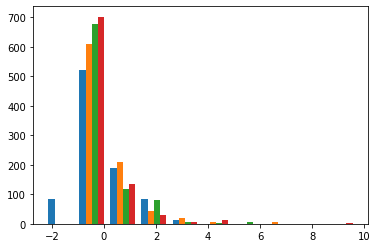

In [326]:
#문제4
import numpy as np
import pandas as pd
from sklearn.preprocessing import*
import matplotlib.pyplot as plt
df=pd.read_csv("train.csv")
df2=df.loc[:,["Age","SibSp","Parch","Fare"]]
df2
df2=df2.fillna(df2.mean()['Age'])
df2=df2.fillna(df2.max()['SibSp'])
df2=df2.fillna(df2.min()['Parch'])
df2=df2.fillna(df2.mean()['Fare'])
df_data=StandardScaler().fit_transform(df2.loc[:,["Age","SibSp","Parch","Fare"]])
print(df_data)
plt.hist(df_data)
